## Supplement 3: Regression

In [60]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 3.2 Programming Task: Gradient Descent
Consider the function $J(\boldsymbol{w})=J(w_0, w_1) =-e^{-\frac{1}{100}(w_1^2 + w_2^2 -w_1w_2 - 2w_1  + 4w_2 + 5)} - 2 e^{-(w_1^2  + w_2^2  - 4w_1- 9 w_2 + 25)}.$

i\. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour plot using the Matplotlib module. 

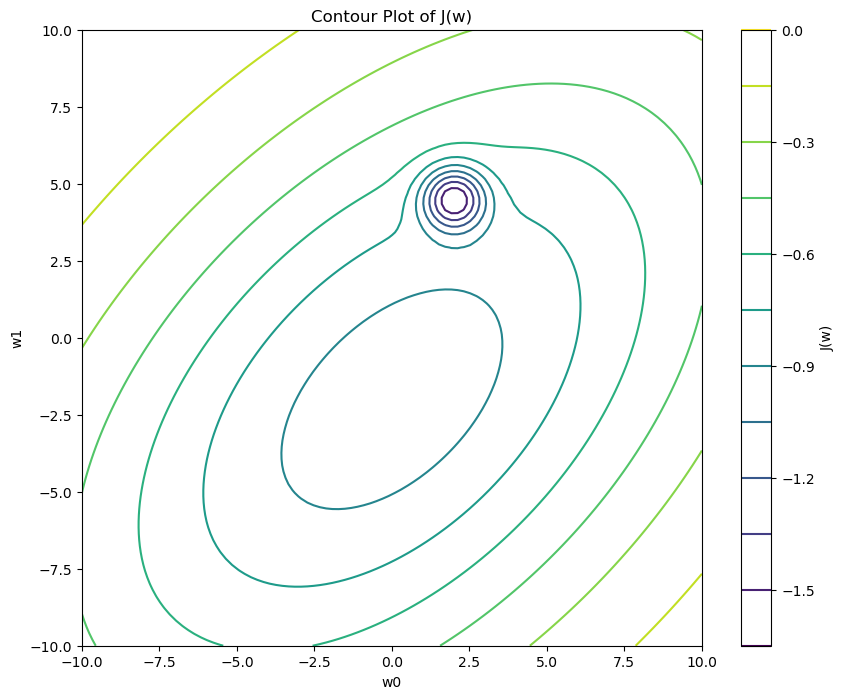

In [61]:
# TODO: Define function J(w)

def J(w):
    w0, w1 = w
    x= -np.exp(-0.01 * ((w0**2 + w1**2 - w0*w1 - 2*w0 + 4*w1 + 5))) - 2*np.exp(-(w0**2 + w1**2 - 4*w0 - 9*w1 + 25))
    return x


# TODO: Prepare contours plot of J(w)
# Generate w values for plotting
w0_values = np.linspace(-10, 10, 100)
w1_values = np.linspace(-10, 10, 100)
W0, W1 = np.meshgrid(w0_values, w1_values)
J_values = J([W0, W1])

# Prepare contours plot of J(w)
plt.figure(figsize=(10, 8))
contour_plot = plt.contour(W0, W1, J_values, levels=15, cmap='viridis')
plt.colorbar(contour_plot, label='J(w)')
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Contour Plot of J(w)')
plt.show()


ii\. Obtain the gradient of the above function by hand.
            
  $Hint:   \nabla J(\boldsymbol{w}) = \left(
  \begin{array}{c}
    \frac{\partial J(\boldsymbol{w})}{\partial w_1} \\ %
    \frac{\partial J(\boldsymbol{w})}{\partial w_2}
  \end{array} \right)
$

iii\. Implement gradient descent algorithm described in the lecture to find the minimum of this
            function using the NumPy module. Plot the location of the new $\boldsymbol{w}$ after each iteration on the contour plot.

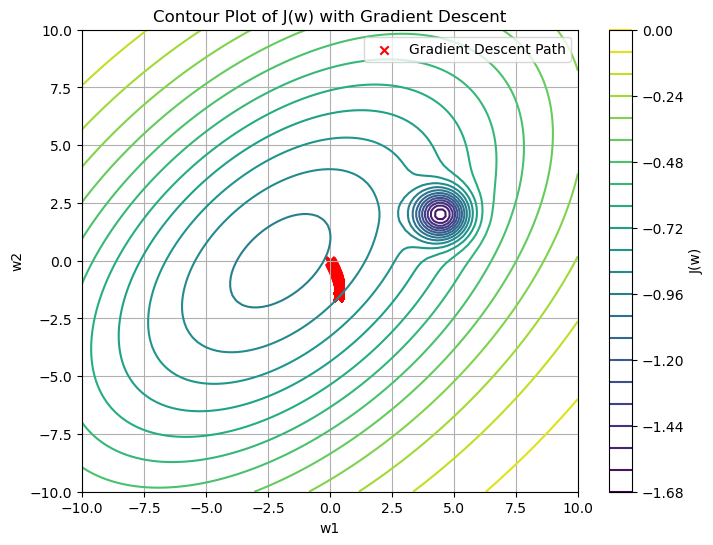

In [62]:
# TODO: Define the function gradient_J(w)
def gradient_J(w):
    w1, w2 = w[0], w[1]
    # Calculate the partial derivatives
    dw1 = (1/100) * np.exp(-0.01 * (w1**2 + w2**2 - w1*w2 - 2*w1 + 4*w2 + 5)) * (2*w1 - w2 - 2) + 4 * np.exp(-(w1**2 + w2**2 - 4*w1 - 9*w2 + 25))
    dw2 = (1/100) * np.exp(-0.01 * (w1**2 + w2**2 - w1*w2 - 2*w1 + 4*w2 + 5)) * (2*w2 - w1 + 4) + 18 * np.exp(-(w1**2 + w2**2 - 4*w1 - 9*w2 + 25))
    return np.array([dw1, dw2])

# TODO: Define the gradient descent algorithm as function
def gradient_descent(initial_w, learning_rate, num_iterations):
    w_values = [initial_w]
    for _ in range(num_iterations):
        current_w = w_values[-1]
        gradient = gradient_J(current_w)
        new_w = current_w - learning_rate * gradient
        w_values.append(new_w)
    return np.array(w_values)

# TODO: Train w 

# Initial parameters
initial_w = np.array([0.0, 0.0])
learning_rate = 0.1
num_iterations = 1000

# Perform gradient descent
w_history = gradient_descent(initial_w, learning_rate, num_iterations)

# TODO: Prepare contour plot and mark each weight update on the plot.
# Create a meshgrid of w1 and w2 values for contour plot
w1_values = np.linspace(-10, 10, 100)
w2_values = np.linspace(-10, 10, 100)
W1, W2 = np.meshgrid(w1_values, w2_values)
J_values = np.zeros_like(W1)

# Define the function J(w)
def J(w):
    w1, w2 = w[0], w[1]
    term1 = -np.exp(-0.01 * (w1**2 + w2**2 - w1*w2 - 2*w1 + 4*w2 + 5))
    term2 = -2 * np.exp(-(w1**2 + w2**2 - 4*w1 - 9*w2 + 25))
    return term1 + term2

# Calculate J(w) for each combination of w1 and w2
for i in range(len(w1_values)):
    for j in range(len(w2_values)):
        J_values[i, j] = J([w1_values[i], w2_values[j]])

# Plot the contour plot
plt.figure(figsize=(8, 6))
contour_plot = plt.contour(W1, W2, J_values, levels=20, cmap='viridis')
plt.colorbar(contour_plot, label='J(w)')
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour Plot of J(w) with Gradient Descent')

# Plot the location of the new w after each iteration
w_history = np.array(w_history)
plt.scatter(w_history[:, 0], w_history[:, 1], color='red', marker='x', label='Gradient Descent Path')

# Add labels and legend
plt.legend()
plt.grid(True)
plt.show()

### 3.3 Programming Task: Housing Price Regression Problem
The file __house\_prices.txt__ contains a data set of house prices: the
first column is the house size in square feet, the second column is the number
of bedrooms, the third column is the price in USD.


i\. Plot house prices vs. house sizes as a scatter plot.

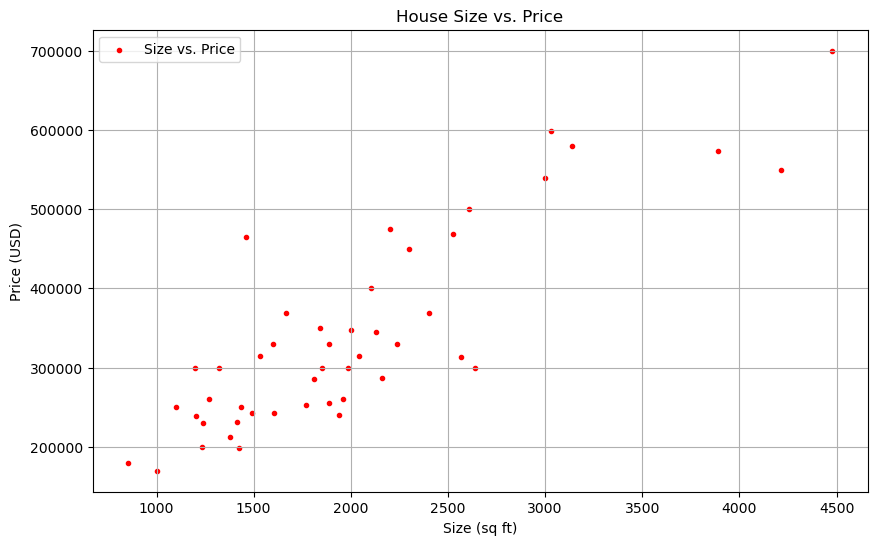

In [63]:
# TODO: Read and prepare scatter plot
import pandas as pd
file_path = r'C:\Users\49177\Documents\Python Scripts\house_prices.txt'

# Read the data into a Pandas DataFrame
df = pd.read_csv(file_path, header=None, names=["Size", "Bedrooms", "Price"])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Size'], df['Price'], marker='.', color='red', label='Size vs. Price')
plt.title('House Size vs. Price')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

ii\. Next, fit the linear regression to these data points. You should not use
    any other python module besides NumPy to find the weights of the model.

* Consider the linear model $h_{\boldsymbol{w}}(\boldsymbol{x})=w_0 x_0 + w_1 x_1={\boldsymbol{w}}^\top\boldsymbol{x}$,
    where $x_1$ is the house size in the first column of __house\_prices.txt__, $x_0=1$ by convention, $\boldsymbol{x}={[x_0,x_1]}^\top$, 
    and $\boldsymbol{w}={[w_0, w_1]}^\top$. Define the cost function on the dataset:
 
    $J(\boldsymbol{w})=\frac{1}{2}\sum_{i=1}^{n} \left(h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})-y^{(i)}\right)^2.$

 
    Above, $n$ is the number of rows in __house_prices.txt__, $y^{(i)}$
    is the house price given in the third column of the file, $\boldsymbol{x}^{(i)} = {[1\
    x_1^{(i)}]}$ and $x_1^{(i)}$ is the house size from the first column and
    $i$th row of the file. $h_{\boldsymbol{w}}(\cdot)$ represents the linear regression model. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour
    plot. You may rescale the data if required. 

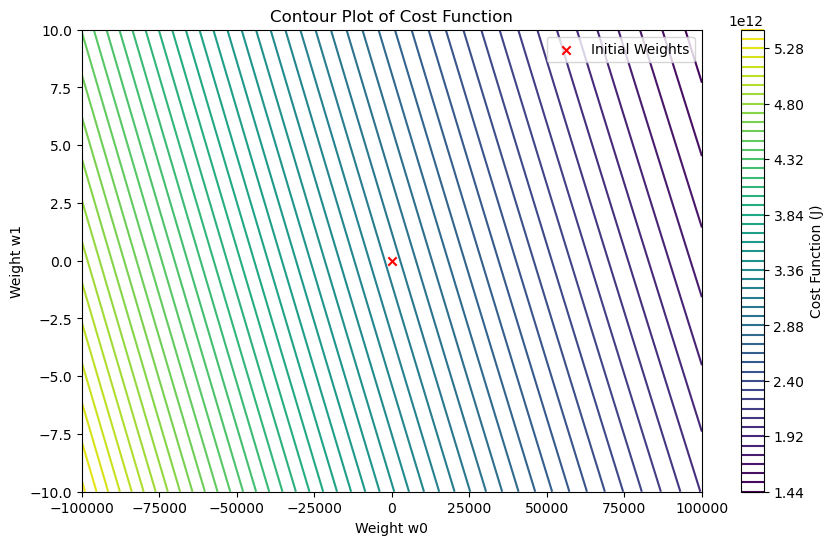

In [64]:
# Define the cost function J(w)
def J(w, x, y):
    m = len(y)
    h = np.dot(x, w)
    return (1/2) * np.sum((h - y)**2)

# Define the gradient of J(w)
def gradient_J(w, x, y):
    m = len(y)
    h = np.dot(x, w)
    return (1/m) * np.dot(x.T, (h - y))

# Extract features and target variable
X = df[['Size']].values
y = df['Price'].values

# Add a column of ones to the feature matrix X
X = add_ones_column(X)

# Initialize weights
initial_w = np.zeros(X.shape[1])

# Define the range of values for w0 and w1
w0_values = np.linspace(-100000, 100000, 100)
w1_values = np.linspace(-10, 10, 100)

# Create a meshgrid of w0 and w1 values
W0, W1 = np.meshgrid(w0_values, w1_values)

# Compute the cost function for each combination of w0 and w1
J_values = np.zeros_like(W0)
for i in range(len(w0_values)):
    for j in range(len(w1_values)):
        J_values[i, j] = J(np.array([W0[i, j], W1[i, j]]), X, y)

# Plot the contour plot of the cost function
plt.figure(figsize=(10, 6))
contour_plot = plt.contour(W0, W1, J_values, levels=50, cmap='viridis')
plt.colorbar(contour_plot, label='Cost Function (J)')
plt.title('Contour Plot of Cost Function')
plt.xlabel('Weight w0')
plt.ylabel('Weight w1')
plt.scatter(0, 0, color='red', marker='x', label='Initial Weights')
plt.legend()
plt.show()

* Start with some initial value $\boldsymbol{w}$
and run the steps of the gradient descent algorithm (you may reuse revelant
parts of the solution from task 3.2). Plot the location of each new $\boldsymbol{w}$ on
the contour plot similar to the previous task.

Iteration 1: w = [3.40412660e+01 7.64209128e+04], Gradient = [-3.40412660e+05 -7.64209128e+08]
Iteration 2: w = [-1.52213066e+04 -3.51600340e+07], Gradient = [1.52553478e+08 3.52364549e+11]
Iteration 3: w = [7.01921494e+06 1.62118031e+10], Gradient = [-7.03443624e+10 -1.62469631e+14]
Iteration 4: w = [-3.23644585e+09 -7.47500178e+12], Gradient = [3.24346506e+13 7.49121358e+16]
Iteration 5: w = [1.49227317e+12 3.44660319e+15], Gradient = [-1.49550962e+16 -3.45407819e+19]
Iteration 6: w = [-6.88063177e+14 -1.58917334e+18], Gradient = [6.89555450e+18 1.59261994e+22]
Iteration 7: w = [3.17254873e+17 7.32742288e+20], Gradient = [-3.17942936e+21 -7.34331462e+24]
Iteration 8: w = [-1.46281123e+20 -3.37855693e+23], Gradient = [1.46598378e+24 3.38588436e+27]
Iteration 9: w = [6.74478751e+22 1.55779831e+26], Gradient = [-6.75941563e+26 -1.56117686e+30]
Iteration 10: w = [-3.10991313e+25 -7.18275764e+28], Gradient = [3.11665792e+29 7.19833562e+32]
Iteration 11: w = [1.43393096e+28 3.31185411e+31]

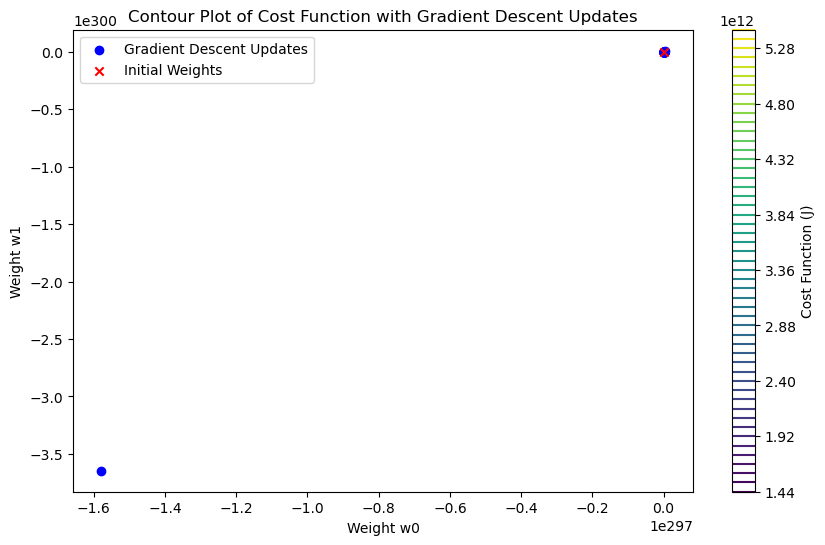

In [65]:
# TODO: Train w 

# Initial parameters
initial_w = np.array([0.0, 0.0])
learning_rate = .0001
num_iterations = 1000

# Store each update of w in an array to make a plot later.
w_updates = []



# Gradient Descent
w = initial_w.copy()
for i in range(num_iterations):
    gradient = gradient_J(w, X, y)
    w = w - learning_rate * gradient

    # Print for debugging
    print(f'Iteration {i + 1}: w = {w}, Gradient = {gradient}')

    # Check for NaN or infinite values in weights
    if np.any(np.isnan(w)) or np.any(np.isinf(w)):
        print("Divergence detected. Try reducing the learning rate.")
        break

    w_updates.append(w.copy())


# Convert the list of weight updates to a NumPy array for easier manipulation
w_updates = np.array(w_updates)

# TODO: Prepare contour plot and mark each weight update on the plot.

# Plot the contour plot of the cost function
plt.figure(figsize=(10, 6))
contour_plot = plt.contour(W0, W1, J_values, levels=50, cmap='viridis')
plt.colorbar(contour_plot, label='Cost Function (J)')
plt.title('Contour Plot of Cost Function with Gradient Descent Updates')
plt.xlabel('Weight w0')
plt.ylabel('Weight w1')

# Plot the updates on the contour plot
plt.scatter(w_updates[:, 0], w_updates[:, 1], c='blue', marker='o', label='Gradient Descent Updates')
plt.scatter(0, 0, color='red', marker='x', label='Initial Weights')
plt.legend()

plt.show()

# OPTIONAL: Plot the resulting linear regression function



* Experiment by making changes to the learning rate of the gradient descent
algorithm. Observe how the path of the algorithm changes. Make sure that the
algorithm converges to the true minimum of the function $J(\boldsymbol{w})$.

C:\Users\49177\AppData\Local\Temp\ipykernel_10516\3352616464.py:7: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * gradient


<Figure size 1500x1500 with 0 Axes>

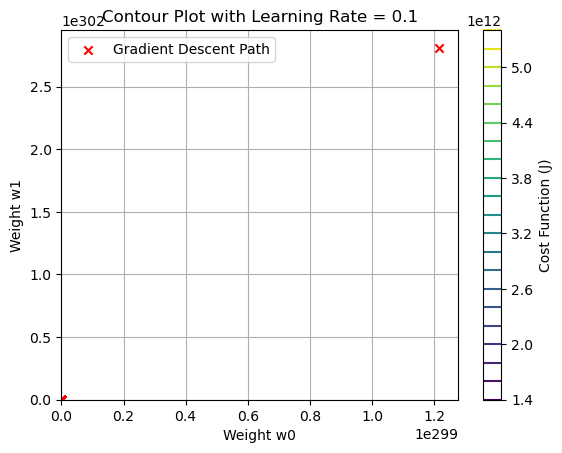

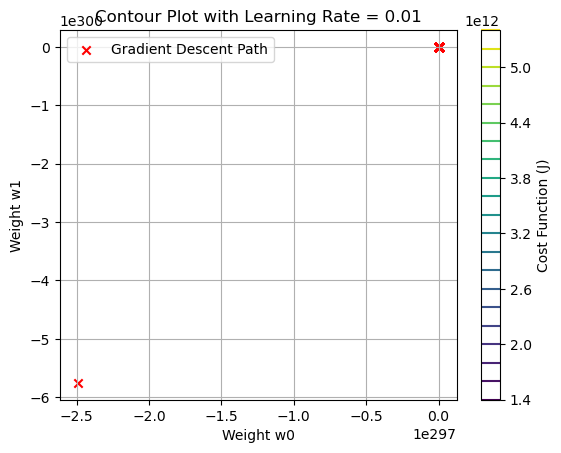

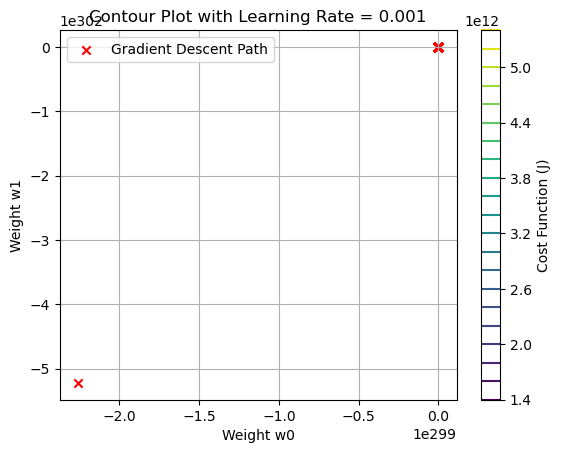

In [66]:
# Function to perform gradient descent
def gradient_descent(w, alpha, num_iterations):
    w_history = [w.copy()]

    for i in range(num_iterations):
        gradient = gradient_J(w, X, y)
        w = w - alpha * gradient
        w_history.append(w.copy())

    return np.array(w_history)

# TODO: Define alphas (learning rates) to test.
alphas = [0.1, 0.01, 0.001]

# TODO: Repeat experiment for each alpha and observe the contour plot in each case. You may use subplots in Matplotlib for the plots.
plt.figure(figsize=(15, 15))

for alpha in alphas:
    # Perform gradient descent
    w_history = gradient_descent(initial_w, alpha, num_iterations)
    
    # Plot the contour plot
    plt.figure()
    contour_plot = plt.contour(W0, W1, J_values, levels=20, cmap='viridis')
    plt.colorbar(contour_plot, label='Cost Function (J)')
    plt.xlabel('Weight w0')
    plt.ylabel('Weight w1')
    plt.title(f'Contour Plot with Learning Rate = {alpha}')
    
    # Plot the location of the new w after each iteration
    plt.scatter(w_history[:, 0], w_history[:, 1], color='red', marker='x', label='Gradient Descent Path')
    
    plt.legend()
    plt.grid(True)

plt.show()



iii\. Determine the weights of the model using the closed form solution for $\boldsymbol{w}$:
\begin{align}
    \hat{\mathbf{w}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^Ty
\end{align}
Above, $\mathbf{y} = [y^{(1)},..., y^{(n)}]^T$ and $\mathbf{X}$ is the data matrix whose rows are $x^{(i)}$. Is this the same point that you have found above using gradient descent?

In [67]:
# TODO: Compute the closed form solution

# Add a column of ones to the features for the bias term
X_closed_form = np.c_[np.ones((len(df), 1)), df['Size'].values]

# the closed form solution
X_transpose = np.transpose(X_closed_form)
w_closed_form = np.linalg.inv(X_transpose.dot(X_closed_form)).dot(X_transpose).dot(y)
print("Weights from Closed Form Solution:", w_closed_form)

Weights from Closed Form Solution: [71270.49244873   134.52528772]
